## **Feature Extract**

두 도메인의 feature를 추출하기에 앞서, 아날로그 형태의 음악 데이터를 학습에 사용하기 위해서는 먼저 windowing(=sampling) 과정을 거쳐주어야 합니다. 또 표준 샘플링 레이트는 44100Hz를 주로 사용합니다. 즉, 1초를 44100등분하여 음악값들을 샘플링 해오겠다는 것입니다.

#### **[방법 1] Rhythm domain feature extraction**

여러가지 rhythm 도메인의 feature 중 Tempogram을 추출합니다.

![image](pic/several_data_p3_4.png)

rhythm feature 추출 흐름도는 위와 같습니다.

리듬이란, 일반적으로 음악의 기본이 되는 규칙적인 펄스 또는 음악에서 전반적으로 유지되는 반복적 패턴을 의미합니다. 이 때 일정한 간격으로 발생하는 펄스를 비트라고 하며, 비트의 강약이 변화하여 만들어지는 패턴을 박자라고 칭합니다.

리듬과 그에 대한 박자는 사실 다양한 변수들이 혼합된 개념이기에 정확히 한 문장으로 정의하기는 힘들지만, 보통 음악적 리듬의 박자 구조는 일정한 간격을 지닌 시간 축 격자에 표시할 수 있는 연속적인 리듬 이벤트를 의미합니다.

음악은 박자 시스템에 기반한 리듬 구조를 가지고 있기 때문에 박자 구조를 분석하는 것이 리듬 분석을 위해서는 필수적이라고 볼 수 있습니다. 그리고 이러한 음악의 리듬 패턴을 분석하는데 사용되는 시간적 feature 중 하나가 Tempogram입니다.

그렇다면 음악의 Tempogram은 어떻게 추출할 수 있을까요?

음악의 Tempogram을 추출하기 위해서는 먼저 windowing을 거쳐 시간별로 쪼개진 데이터를 librosa.onset.onset_strength() 함수의 입력으로 주어 onset 지점을 탐지해야 합니다. Onset이란, 주로 박자의 첫 번째 비트나 강조되는 리듬 변화가 발생하는 시점을 의미합니다. 그렇기 때문에 onset 지점을 검출하는 것이 곧 음악의 리듬을 분석하는 것이고, 이를 수행하는 다양한 방식이 있지만 대표적으로 주파수 스펙트럼의 변화, 에너지 변화 등을 파악하여 onset 지점을 검출합니다.

다음으로는 이렇게 탐지된 onset 지점을 작은 프레임 단위로 나누고 각 프레임에 대해 autocorrelation(자기상관) 값을 계산합니다. 이는 각 onset 지점의 자기상관성을 분석한 그래프로, 시간 지연된 타 onset 지점과의 유사도를 계산하여 주기성과 리듬 정보를 파악할 수 있게 됩니다.

![image](pic/several_data_p3_5.png)

위 그림에서 가운데 그래프가 onset 검출 점수 그래프에 해당합니다. 앞선 과정을 거쳐 시간 지연 축에 대한 자기상관함수 값을 얻었다면, 위 값들을 통해 Tempogram 값을 얻어야 합니다. 현재 자기상관함수는 시간 지연 축에 대해 나타나 있기 때문에, 템포에 대한 축으로 변경해주어야 이 값들을 유의미하게 활용할 수 있습니다.
이러한 변형은 아래 두 과정을 거쳐 이루어집니다.

- Tempo (in BPM) = 60 / Timelag (in sec) 식을 적용하여 x축 변환
- 음악적으로 유의미한 tempo 축을 갖도록 보간 적용

![image](pic/several_data_p3_6.png)

우선 첫 번째 식을 적용해 자기상관함수의 time-lag 축을 tempo(BPM)축으로 바꾸어줍니다. 이렇게 되면 수식에 따라 tempo 축의 범위가 선형적이지 않은데, 이를 펴주기 위해 tempo 축에 대한 보간을 수행합니다.

위와 같은 과정을 거쳐 음악의 Tempogram을 얻을 수 있습니다. 과정이 어렵고 생소할 수 있지만 librosa 라이브러리에서는 단순히 앞서 얻은 onset_strength 값을 librosa.feature.tempogram()의 인자로 넘겨줌으로써 음악의 Tempogram을 얻을 수 있습니다.

#### **[방법 2] Spectral domain feature extraction**
spectral 도메인의 여러 feature 중 Chromagram과 MFCC를 추출합니다.

![image](pic/several_data_p3_7.png)

spectral feature 추출 흐름도는 위와 같습니다.

마찬가지로 처음엔 windowing을 거쳐 음성 데이터를 이산화합니다.

Windowing 과정을 거쳐 잘게 나누어진 프레임들에 각각 STFT(Short Time Fourier Transform)를 적용해 주파수 도메인으로 변환된 spectrogram을 얻는 과정을 거칩니다. 이에 대해서는 아래에서 계속 설명드리겠습니다.

![image](pic/several_data_p3_8.png)

STFT(librosa.stft())는 음성 신호의 시간적 정보를 잘 활용하기 위해 각 프레임마다 FFT(Fast Fourier Transform)을 적용하여 시간 도메인의 데이터를 주파수 도메인으로 변환해주는 과정입니다. 일정 시간 영역에는 수많은 주파수가 혼합되어 있어 정보를 분석하기 어렵기 때문에 음성의 고유 배음구조를 유추할 수 있도록 신호를 위 그림과 같이 주파수 영역으로 변환시켜주는 것입니다.

![image](pic/several_data_p3_9.png)

FFT를 음성의 전체 시간 영역에 한 번에 적용하게 되면 음성의 시계열적 특성 정보를 제대로 활용할 수 없게 됩니다. 따라서 전체 시간 영역에 대해 FFT를 한 번에 적용하는 것이 아닌, 위 그림과 같이 잘게 나뉜 영역에 대해 여러 번(총 window 개수만큼) FFT를 적용하여 주파수 도메인으로 변환(=STFT)해준다면 주파수 정보 뿐만 아니라 시간적 순서와 관련된 time frame에 대한 정보까지 얻을 수 있게 됩니다.

STFT를 적용하여 얻은 값(=spectrum)의 magnitude를 사용하기 위해 절대값을 취하여 spectrogram을 얻고, 이렇게 얻은 spectrogram을 제곱하여 power spectrogram을 얻습니다. 다음 함수의 입력으로 spectrogram이 아니라 power spectrogram이 사용되는 이유는 주파수 도메인에서 시간에 따른 신호의 에너지를 강조해줄 수 있기 때문입니다. 제곱을 함으로써 음악 신호의 패턴을 더 쉽게 감지하고, 음악에서 특징점이 될 수 있는 부분을 잡아내는 데에 더욱 도움되는 값을 얻어낼 수 있는 것입니다.

##### **1) Chromagram**

Chromagram이란 음악의 주파수 정보를 사용해 음악의 음계 기반 특성을 파악하는 방법입니다. 음악의 주파수 영역에서 각 음높이에 해당하는 성분들의 빈도 정보를 표현하여 음악의 화음과 멜로디 정보를 추출할 수 있게 되는 것입니다.

Chromagram은 기본값으로 하나의 프레임을 12차원의 벡터로 표현하는데, 여기서 12란 숫자는 서양 음악에서 사용되는 12음계 체계(도, 도#, 레, 레#, 미, 파, 파#, 솔, 솔#, 라, 라#, 시)를 기반으로 설정된 것입니다. 참고로 이 12음계를 chromatic scale이라 부르고, 이 음계를 기반으로 분석하는 것이 Chromagram인 것입니다.

![image](pic/several_data_p3_10.png)

앞서 얻은 power spectrogram을 입력으로 주어 각 프레임에서 12개의 음들이 얼마나 등장하는지를 나타내는 크로마 밴드를 구하고, 이에 해당하는 파형 크기의 제곱 값을 합하여 Chromagram을 만들어냅니다. 위 그림은 12개의 음계를 바탕으로 만들어낸 음악의 Chromagram입니다.

Chromagram은 librosa.feature.chroma_stft()에 power spectrogram을 입력으로 주어 추출할 수 있습니다.

##### **2) MFCC**

MFCC는 Mel Frequency Cepstral Coefficient의 약자입니다. 다양한 음성 feature가 존재하지만, MFCC는 사람의 청각 기관 특성을 가장 잘 살려 설계된 feature 중 하나에 해당하고 현재까지도 음성, 음악 관련 task를 수행하기 위해 많이 사용됩니다.

다시 전체 파이프라인 그림으로 올라가보시면 MFCC는 power spectrogram에 melfilter 필터를 적용해 melspectrogram(librosa.feature.melspectrogram())을 추출하고, 켑스트럴 분석(DCT, Discrete Cosine Transform, librosa.power_to_db())를 거쳐 얻게됩니다.

**Melspectrogram**<br>

실제로 사람의 달팽이관은 저주파 대역을 감지하는 부분은 굵고, 고주파 대역을 감지하는 부분은 얇습니다. Melfilter는 이렇게 사람의 청각기관이 높은 주파수보다 낮은 주파수 대역에 더욱 민감하게 반응한다는 사실을 반영하여 power spectrogram을 조정하는 역할을 수행합니다.

![image](pic/several_data_p3_11.png)

위 그림은 melfilter인데 상대적으로 높은 주파수 대역으로 갈수록 필터가 감소하는 것을 볼 수 있습니다. 이를 적용해 사람이 더욱 민감하게 반응하는 주파수 대역을 강조한 값으로 변환된 melspectrogram을 얻을 수 있게 됩니다.

**Cepstral analysis**<br>

다음은 앞서 얻은 melspectrogram에 켑스트럴 분석 과정을 적용하고 이를 통해 최종적인 MFCC feature를 얻을 수 있습니다.
과정상으로 보면, melspectrogram을 log scale로 만들어 log spectrogram을 얻고 이에 DCT(Discrete Cosine Transform)를 적용하여 최종 MFCC feature를 추출하게 되는 것입니다.

여기서 log scale로 만드는 이유는, 사람의 소리 인식이 log scale에 가깝기 때문입니다. 다시 말해 사람이 두 배 큰 소리라고 인식하기 위해서는, 실제로 에너지가 100배 큰 소리여야 한다는 특성을 feature 추출 과정에 적용해주었다는 뜻입니다. 다음으로 DCT는 대부분의 실제 신호가 우함수이기 때문에 입력신호를 우함수인 코사인 함수의 합으로 표현해주는 과정입니다. DCT의 변환 결과는 계수 형태로 나타나며, log spectrogram에 DCT를 적용했을 때 주파수 성분으로 분해하여 얻은 계수 중 주로 사용되는 일부 계수들만 선택하면 그것이 MFCC feature로서 사용되는 것입니다.

In [1]:
# 라이브러리 임포트
import math
import os
import random

import numpy as np
import pandas as pd

import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from tqdm import tqdm

In [2]:
torch.__version__, torchvision.__version__

('2.4.0+cu121', '0.19.0+cu121')

In [3]:
# 하이퍼파라미터
args = {
    "train_path" : "/kaggle/input/2024-outta-basic-p-3/train/train/",
    "test_path" : "/kaggle/input/2024-outta-basic-p-3/test/test/",
    "submit_path" : "/kaggle/input/2024-outta-basic-p-3/sample_submission.csv",
    "extract_features" : "spectral",  # "rhythm"과 "spectral" 중에 선택하세요. + "img"
    "batch_size" : 64,
    "num_labels" : 10,
    "epochs" : 200,
    "lr" : 0.005, 
    "eps" : 1e-8,
    "seed_val" : 42     # 절대 수정하지 마세요.
}

In [4]:
# 랜덤시드 고정하기
seed = args["seed_val"]
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available() : 
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# 디바이스 선택
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
"""
mac env
if torch.backends.mps.is_available():
    device = torch.device('mps')
torch.backends.mps.is_available(), torch.__version__
"""

"\nmac env\nif torch.backends.mps.is_available():\n    device = torch.device('mps')\ntorch.backends.mps.is_available(), torch.__version__\n"

In [6]:
%pip install torchsummary


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [7]:
from torchsummary import summary as summary_## 모델 정보를 확인하기 위해 torchsummary 함수 import

## 모델의 형태를 출력하기 위한 함수 
def summary_model(model, input_shape):
    model = model.to(device)
    summary_(model, input_shape) ## (model, (input shape))

In [8]:
# (선택) Ipython 라이브러리를 이용해 학습에 사용될 음성을 직접 들어볼 수 있습니다.
from IPython.display import Audio, display

filename = args['test_path'] + '0001.wav'  # 파일 주소

y, sr = librosa.load(filename)
audio_wdt = Audio(data=y,rate=sr)
display(audio_wdt)

# **1. 데이터**

## **(1) Label Map**
{'강아지' : 0, '고양이' : 1} 등과 같은 형식으로, 머신러닝, 딥러닝 모델들은 feature나 label의 값들이 숫자(정수/실수)인 것만 처리할 수 있기 때문에, 문자열일 경우 숫자형으로 변환하여 처리합니다.

In [9]:
label_map = {'blues': 0, 
             'classical': 1, 
             'country': 2, 
             'disco': 3, 
             'hiphop': 4, 
             'jazz': 5, 
             'metal': 6, 
             'pop': 7, 
             'reggae': 8, 
             'rock': 9}

## **(2) Feature Extract**
컴퓨터에 입력할 수 있도록 샘플링과 양자화를 거쳤다고 해도, 이를 바로 분류기에 넣는 것은 높은 성능을 보장할 수 없습니다.<br>
이는 음성 정보 안에 여러 주파수가 섞여 있으며 방대한 정보를 담고 있기 때문입니다.<br>
따라서 데이터 중 음성의 대표적인 성질을 나타낼 수 있는 handcrafted feature를 추출하여 사용하는 것이 필수적입니다.<br>
데이터에서 어떠한 특징을 어떠한 방식으로 추출하는지에 따라 분류기 성능에 큰 영향을 끼칠 수 있기 때문에 feature 추출을 위해서는 신중한 설계가 선행되어야 합니다.<br>

- 참고 1 : https://librosa.org/doc/latest/index.html
- 참고 2 : https://wikidocs.net/192879

#### **Method 1. Rhythm**
- Method 1에서는 rhythm 도메인의 두 가지 feature인 autocorrelation tempogram과 fourier tempogram을 추출합니다.
- 단, librosa.load() 함수를 통해 얻은 time-series (y, sr)를 입력으로 주어 두 feature를 얻는 것을 목표로 합니다.
- 각 단계별 세부 내용은 아래 함수를 참고하시기 바랍니다.

(1-1) librosa.load(): extract_rhythm_features() 함수의 인자로 넘겨 받은 file_path에 대하여 1초 당 22050개의 샘플을 추출한 time-series를 load합니다.<br>
(1-2) librosa.onset.onset_strength(): 앞서 load한 time-series를 함수의 입력으로 주어 onset_envelope를 추출합니다.<br>
(1-3) librosa.feature.tempogram(): 앞서 추출한 onset_envelope와 sr을 함수의 입력으로 주어 autocorrelation tempogram feature를 추출합니다.<br>
(1-4) autocorrelation tempogram에 대해 시간 축으로 평균을 내고 절대값을 취해 복소수를 제거함으로써 tempogram_feature를 얻습니다.

In [10]:
def extract_rhythm_features(file_path):
    # 반환할 feature list 선언
    feature = []
    
    # (1-1) librosa.load(): extract_rhythm_features() 함수의 인자로 넘겨 받은 file_path에 대하여 1초 당 22050개의 샘플을 추출한 time-series를 load합니다.
    # y: audio_signal : np.ndarray
    # sr: sample_rate : scalar
    # duratrion : float
    
    y, sr = librosa.load(file_path, sr=22050)
    # example in librosa
    #y, sr = librosa.load(librosa.ex('trumpet'), sr=22050)
    
    # (1-2) librosa.onset.onset_strength(): 앞서 load한 time-series를 함수의 입력으로 주어 onset_envelope를 추출합니다.
    # 리듬 변화가 발생하는 지점인 onset을 탐지
    onset_envelope = librosa.onset.onset_strength(y=y, sr=sr)
    #plt.plot(onset_envelope)
    
    # autocorrelation tempogram
    # (1-3) librosa.feature.tempogram(): 앞서 추출한 onset_envelope와 sr을 함수의 입력으로 주어 autocorrelation tempogram feature를 추출합니다. 함수의 입력 변수를 잘 확인하세요.
    # win_length(default) = 384
    tempogram = librosa.feature.tempogram(sr=sr, onset_envelope=onset_envelope)
    #librosa.display.specshow(tempogram)
    
    # (1-4) autocorrelation tempogram에 대해 시간 축으로 평균을 내고 절대값을 취해 복소수를 제거함으로써 tempogram_feature를 얻습니다.
    tempogram_feature = np.abs(np.mean(tempogram, axis=1))   # (384, 1293) -> (384, ), 복소수를 없애기 위해 절대값 처리
    
    
    """    std_length = 1293
    if tempogram.shape[1] < std_length:
        tempogram = np.pad(tempogram, ( (0,0), (0, std_length - tempogram.shape[1]) )  ,'edge')
    elif tempogram.shape[1] > std_length:
        tempogram = tempogram[:,:std_length]
    """
    
    feature = tempogram_feature
    return feature

In [11]:
sample = extract_rhythm_features(args["test_path"] + '0010.wav')
sample.shape

(384,)

#### **Method 2. Spectral**
- Method 2에서는 spectral 도메인의 두 가지 feature인 MFCC와 chromagram을 추출합니다.
- 단, librosa 라이브러리의 함수를 통해 spectrogram, power_spectrogram, melspectrogram, melspectrogram_db를 순차적으로 얻고, 이를 입력으로 주어 두 feature를 얻는 것을 목표로 합니다.
- 각 단계별 세부 내용은 아래 함수를 참고하시기 바랍니다.

(2-1) librosa.load(): extract_spectral_features() 함수의 인자로 넘겨 받은 file_path에 대하여 1초 당 22050개의 샘플을 추출한 time-series를 load합니다.<br>
(2-2) librosa.stft(): 앞서 load한 time-series를 함수의 입력으로 주어 stft를 추출하고, 절대값을 취해 spectrogram을 추출합니다.<br>
(2-3) 앞서 얻은 spectrogram에 제곱 연산을 취해 power_spectrogram을 얻습니다.<br>
(2-4) librosa.feature.melspectrogram(): 앞서 얻은 power_spectrogram을 함수의 입력으로 주어 melspectrogram을 추출합니다.<br>
(2-5) librosa.power_to_db(): 앞서 얻은 melspectrogram을 함수의 입력으로 주어 db scale로 변환된 melspectrogram_db를 추출합니다.<br>
(2-6) librosa.feature.chroma_stft(): (2-3)에서 얻은 power_spectrogram을 함수의 입력으로 주어 chromagram을 추출합니다.<br>
(2-7) chromagram에 대해 시간 축으로 평균을 내어 feature로 사용할 수 있도록 변환합니다.<br>
(2-8) librosa.feature.mfcc(): (2-5)에서 얻은 melspectrogram_db를 함수의 입력으로 주어 mfcc를 추출합니다.<br>
(2-9) mfcc에 대해 시간 축으로 평균을 내어 feature로 사용할 수 있도록 변환합니다.<br>
(2-10) chromagram과 mfcc를 하나의 feature로 반환할 수 있도록 concatenate를 수행합니다.

In [12]:
def extract_spectral_features(file_path):
    # 반환할 feature list 선언
    feature = []
    
    # (2-1) librosa.load(): extract_spectral_features() 함수의 인자로 넘겨 받은 file_path에 대하여 1초 당 22050개의 샘플을 추출한 time-series를 load합니다.  
    y, sr = librosa.load(file_path, sr=22050, duration=3)

    # (2-2) librosa.stft(): 앞서 load한 time-series를 함수의 입력으로 주어 stft를 추출하고, 절대값을 취해 복소수를 제거한 spectrogram을 추출합니다.  
    # * 이 때, 93ms의 물리적 간격으로 나뉘어 spectrogram이 생성될 수 있도록 하이퍼파라미터 n_fft를 조절합니다. 어떠한 값을 넣어야 하는지는 공식 문서를 참고하세요.
    
    # The default value, n_fft=2048 samples, corresponds to a physical duration of 93 milliseconds at a sample rate of 22050 Hz
    n_fft = int(0.093 * sr)
    # 보통 hop_length 는 1/4 n_ftt
    hop_length = int(n_fft / 4)
    spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, win_length=n_fft, hop_length=hop_length, window='hann'))
    
    #fig, axes = plt.subplots(5,1, figsize=(10,10))
    #axes[0].imshow(spectrogram)
    #axes[0].set_title('spectrogram')
    
    # (2-3) 앞서 얻은 spectrogram에 제곱 연산을 취해 power_spectrogram을 얻습니다.  
    power_spectrogram = spectrogram ** 2
    power_spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    #librosa.display.specshow(power_spectrogram,)
    #axes[1].set_title('power_spectrogram')
    #axes[1].imshow(power_spectrogram)
    
    # (2-4) librosa.feature.melspectrogram(): 앞서 얻은 power_spectrogram을 함수의 입력으로 주어 melspectrogram을 추출합니다.  
    
    melspectrogram = librosa.feature.melspectrogram(S = power_spectrogram, sr=sr, hop_length=hop_length)
    #print(melspectrogram.shape)
    #axes[2].set_title('melspectrogram')
    #axes[2].imshow(melspectrogram)
    
    # (2-5) librosa.power_to_db(): 앞서 얻은 melspectrogram을 함수의 입력으로 주어 db scale로 변환된 melspectrogram_db를 추출합니다.  
    melspectrogram_db = librosa.power_to_db(S=melspectrogram)
    #axes[3].set_title('melspectrogram_db')
    #axes[3].imshow(melspectrogram_db)
    #print(melspectrogram_db.shape)
    
    # chromagram
    # (2-6) librosa.feature.chroma_stft(): (2-3)에서 얻은 power_spectrogram을 함수의 입력으로 주어 chromagram을 추출합니다. 함수의 입력 변수를 잘 확인하세요.
    chromagram = librosa.feature.chroma_stft(S = power_spectrogram, sr=sr,n_fft=n_fft, hop_length=hop_length)   # (12, 1293)
    #print(chromagram.shape)
    #librosa.display.specshow(chromagram)
    #axes[4].set_title('chromagram')
    #axes[4].imshow(chromagram)
    # chromagram : 12x1293
    
    """
    #print(melspectrogram_db.shape)
    if melspectrogram_db.shape[1] < 324:
        melspectrogram_db = np.pad(melspectrogram_db, ( (0,0), (0, 324 - melspectrogram_db.shape[1]) )  ,'edge')
    elif melspectrogram_db.shape[1] > 324:
        melspectrogram_db = melspectrogram[:,:324]
    """
    
    # (2-7) chromagram에 대해 시간 축으로 평균을 내어 chromagram_feature를 얻습니다. 
    chromagram_feature = chromagram.mean(axis=1)  # (12, )
    
    # mfcc
    # (2-8) librosa.feature.mfcc(): (2-5)에서 얻은 melspectrogram_db를 함수의 입력으로 주어 mfcc를 추출합니다. 함수의 입력 변수를 잘 확인하세요.
    mfcc = librosa.feature.mfcc(S=melspectrogram_db, sr=sr, n_fft=n_fft, hop_length=hop_length)  # (20, 1293)
    #axes[4].set_title('mfcc')
    #axes[4].imshow(mfcc)
    
    
    # (2-9) mfcc에 대해 시간 축으로 평균을 내어 mfcc_feature를 얻습니다.  
    mfcc_feature = mfcc.mean(axis=1)   # (20, )
    
    # (2-10) chromagram과 mfcc를 하나의 feature로 반환할 수 있도록 concatenate를 수행합니다.
    feature = np.concatenate((chromagram_feature, mfcc_feature))

    return feature

In [13]:
sample = extract_spectral_features(args["train_path"] + 'blues/blues.00010.wav')
sample.shape

(32,)

In [14]:
"""
compare melspectrogram

change the return to melspectrogram and execute

fig, axes = plt.subplots(9,1,figsize=(5,30))
plt.subplots_adjust(hspace=1.2)

for idx, label in enumerate(label_map.keys()):
    filename = args["train_path"] + f"{label}/{label}.00011.wav"
    sample = extract_spectral_features(filename)
    #axes[idx-1].imshow(sample)
    axes[idx-1].set_title(label)
    axes[idx-1].imshow(sample)
    #librosa.display.specshow(sample,ax=axes[idx-1],y_axis='log', x_axis='time')
print(sample.shape)

"""

'\ncompare melspectrogram\n\nchange the return to melspectrogram and execute\n\nfig, axes = plt.subplots(9,1,figsize=(5,30))\nplt.subplots_adjust(hspace=1.2)\n\nfor idx, label in enumerate(label_map.keys()):\n    filename = args["train_path"] + f"{label}/{label}.00011.wav"\n    sample = extract_spectral_features(filename)\n    #axes[idx-1].imshow(sample)\n    axes[idx-1].set_title(label)\n    axes[idx-1].imshow(sample)\n    #librosa.display.specshow(sample,ax=axes[idx-1],y_axis=\'log\', x_axis=\'time\')\nprint(sample.shape)\n\n'

## **(3) Custom Dataset**
Custom Dataset 클래스는 크게 **__init__(), __len__(), 그리고 __getitem__()** 3개의 함수로 구현해야 합니다. 

1.  __init__()
    - Dataset instance를 생성할 때 한번만 실행되는 함수로, 입력 이미지의 디렉토리와 라벨 정보 그리고 transform을 초기화 합니다. 

2. __len__()
    - 데이터셋의 샘플 개수를 반환하는 함수 입니다. 
    
3. __getitem__()
    - 주어진 인덱스에 해당하는 데이터 샘플을 데이터셋에서 불러오고 반환하는 함수 입니다.

In [15]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_path, split, extract_features, label_map):
        self.split = split.upper()
        self.root_path = root_path
        self.extract_features = extract_features
        self.label_map = label_map
        
        self.music = []
        self.label = []
        
        # (3-1) test 데이터 디렉토리 경로 초기화
        if self.split == 'TEST':
            musics = sorted(os.listdir(self.root_path))
            for music_ in musics:
                self.music.append(os.path.join(self.root_path, music_))
                
            
        # (3-2) train 데이터 디렉토리 경로, 라벨 초기화
        elif self.split == 'TRAIN':
            genres = sorted(os.listdir(self.root_path))
            for genre_ in genres:
                genre_path = os.path.join(self.root_path, genre_)
                if not os.path.isdir(genre_path):
                    continue
                musics = sorted(os.listdir(genre_path))
                len_musics = len(musics)
                for idx, music_ in enumerate(musics):
                    if idx <= int(len_musics * 0.9):    
                        self.music.append(os.path.join(genre_path, music_))
                        self.label.append(self.label_map[genre_])
        
        # (3-3) valid 데이터 디렉토리 경로, 라벨 초기화
        else:
            genres = sorted(os.listdir(self.root_path))
            for genre_ in genres:
                genre_path = os.path.join(self.root_path, genre_)
                if not os.path.isdir(genre_path):
                    continue
                musics = sorted(os.listdir(genre_path))
                len_musics = len(musics)
                for idx, music_ in enumerate(musics):
                    if idx > int(len_musics * 0.9):    
                        self.music.append(os.path.join(genre_path, music_))
                        self.label.append(self.label_map[genre_])
            
    # 전체 데이터 샘플 개수 반환
    def __len__(self):
        return len(self.music)
    
    # 주어진 인덱스에 해당하는 데이터 반환
    def __getitem__(self, idx):        
        # (3-3) 음악 데이터에 feature extract 적용
        
        if self.extract_features == 'spectral':
            music_feature = extract_spectral_features(self.music[idx])
        elif self.extract_features == 'rhythm':
            music_feature = extract_rhythm_features(self.music[idx])
        
        # (3-4) test에 사용할 데이터 반환
        if self.split == 'TEST':
            return music_feature
        # (3-5) train, valid 에 사용할 데이터 반환
        else:
            label = self.label[idx]
            return music_feature, label

### **(4) 데이터셋과 데이터로더**

In [16]:
# (4-1) 훈련 및 테스트 데이터셋 로드
train_dataset = CustomDataset(root_path=args['train_path'], split='train', extract_features=args['extract_features'], label_map=label_map)
valid_dataset = CustomDataset(root_path=args['train_path'], split='valid', extract_features=args['extract_features'], label_map=label_map)
test_dataset = CustomDataset(root_path=args['test_path'], split='test', extract_features=args['extract_features'], label_map=label_map)


# (4-2) 데이터로더 정의
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=args['batch_size'], shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [17]:
print(f'Train Music Data\'s shape : {train_dataset.__getitem__(0)[0].shape}')   # train_dataset의 반환값 : music_feature, label
print(f'Valid Music Data\'s shape : {valid_dataset.__getitem__(0)[0].shape}')   # valid_dataset의 반환값 : music_feature, label
print(f'Test Music Data\'s shape : {test_dataset.__getitem__(0).shape}')        # test_dataset의 반환값 : music_feature

print(f'Train Music Data\'s len : {train_dataset.__len__()}')   # train_dataset의 반환값 : music_feature, label
print(f'Valid Music Data\'s len : {valid_dataset.__len__()}')   # valid_dataset의 반환값 : music_feature, label
print(f'Test Music Data\'s len : {test_dataset.__len__()}')        # test_dataset의 반환값 : music_feature

Train Music Data's shape : (32,)
Valid Music Data's shape : (32,)
Test Music Data's shape : (32,)
Train Music Data's len : 826
Valid Music Data's len : 88
Test Music Data's len : 300


# **3. 모델**
모델을 직접 설계하여 프로젝트를 수행하세요.

직접 쌓기만 하신다면, 어떤 모델이든 사용 가능합니다.

아래는 베이스라인 모델입니다.

> ```
>         Layer (type)               Output Shape         Param #
> =================================================================
>             Conv1d-1              [-1, 64, 384]             256
>               ReLU-2              [-1, 64, 384]               0
>             Conv1d-3              [-1, 64, 384]          12,352
>               ReLU-4              [-1, 64, 384]               0
>          MaxPool1d-5              [-1, 64, 192]               0
>             Conv1d-6             [-1, 128, 192]          24,704
>               ReLU-7             [-1, 128, 192]               0
>             Conv1d-8             [-1, 128, 192]          49,280
>               ReLU-9             [-1, 128, 192]               0
>         MaxPool1d-10              [-1, 128, 96]               0
>            Conv1d-11              [-1, 256, 96]          98,560
>              ReLU-12              [-1, 256, 96]               0
>            Conv1d-13              [-1, 256, 96]         196,864
>              ReLU-14              [-1, 256, 96]               0
>            Conv1d-15              [-1, 256, 96]         196,864
>              ReLU-16              [-1, 256, 96]               0
>         MaxPool1d-17              [-1, 256, 48]               0
>            Conv1d-18              [-1, 512, 48]         393,728
>              ReLU-19              [-1, 512, 48]               0
>            Conv1d-20              [-1, 512, 48]         786,944
>              ReLU-21              [-1, 512, 48]               0
>            Conv1d-22              [-1, 512, 48]         786,944
>              ReLU-23              [-1, 512, 48]               0
>         MaxPool1d-24              [-1, 512, 24]               0
>            Conv1d-25              [-1, 512, 24]         786,944
>              ReLU-26              [-1, 512, 24]               0
>            Conv1d-27              [-1, 512, 24]         786,944
>              ReLU-28              [-1, 512, 24]               0
>            Conv1d-29              [-1, 512, 24]         786,944
>              ReLU-30              [-1, 512, 24]               0
>         MaxPool1d-31              [-1, 512, 12]               0
> AdaptiveAvgPool1d-32               [-1, 512, 1]               0
>           Flatten-33                  [-1, 512]               0
>            Linear-34                   [-1, 10]           5,130
> =================================================================
> Total params: 4,912,458
> Trainable params: 4,912,458
> Non-trainable params: 0
> ----------------------------------------------------------------
> Input size (MB): 0.00
> Forward/backward pass size (MB): 4.74
> Params size (MB): 18.74
> Estimated Total Size (MB): 23.48
> ----------------------------------------------------------------
> ```


In [18]:
# (5) 모델 설계
# 5초 잘라서 melspectrogram 만들어서 conv2D로, vgg16 작은 버전으로 -> 학습 잘 안 됨.
class Model(nn.Module):
    def __init__(self):
        """
        모델 초기화 함수입니다.
        """
        super(Model, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(512, 16),
            #nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 10)
            #nn.BatchNorm1d(10),
            #nn.ReLU(),
            #nn.Linear(32,10)
        )        

    def forward(self, x):
        """
        모델의 순전파 함수입니다.

        Args:
            x (torch.Tensor): 입력 데이터

        Returns:
            torch.Tensor: 출력 예측값
        """
        x = x.unsqueeze(1)
        #print(f"shape of x : {x.shape}")
        x = self.features(x)
        x = self.classifier(x)
        
        return x

In [19]:
# (5) 모델 설계
# Baseline Model
class Model(nn.Module):
    def __init__(self):
        """
        모델 초기화 함수입니다.
        """
        super(Model, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv1d(in_channels=1,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(64),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(64),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.MaxPool1d(kernel_size=2, stride=2),
            
            nn.Conv1d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(128),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=128,out_channels=128,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(128),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.MaxPool1d(kernel_size=2, stride=2),
            
            nn.Conv1d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(256),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(256),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=256,out_channels=256,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(256),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.MaxPool1d(kernel_size=2, stride=2),
            
            nn.Conv1d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.MaxPool1d(kernel_size=2, stride=2),
            
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.Conv1d(in_channels=512,out_channels=512,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm1d(512),
            #nn.ReLU(),
            #nn.Dropout(0.3),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),
            nn.Flatten(),
            nn.Linear(512, 10),
            #nn.BatchNorm1d(10),
            #nn.ReLU(),
        )        

    def forward(self, x):
        """
        모델의 순전파 함수입니다.

        Args:
            x (torch.Tensor): 입력 데이터

        Returns:
            torch.Tensor: 출력 예측값
        """
        x = x.unsqueeze(1)
        #print(f"shape of x : {x.shape}")
        x = self.features(x)
        x = self.classifier(x)
        
        return x

In [20]:
# (5) 모델 설계
# epoch 15, lr 0.0002, 
class Model(nn.Module):
    def __init__(self):
        """
        모델 초기화 함수입니다.
        """
        super(Model, self).__init__()
                
        self.classifier = nn.Sequential(
            nn.Linear(32, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 10)
            #nn.BatchNorm1d(10),
            #nn.ReLU(),
            #nn.Linear(32,10)
        )        

    def forward(self, x):
        """
        모델의 순전파 함수입니다.

        Args:
            x (torch.Tensor): 입력 데이터

        Returns:
            torch.Tensor: 출력 예측값
        """
        #x = x.unsqueeze(1)
        #print(f"shape of x : {x.shape}")
        #x = self.features(x)
        x = self.classifier(x)
        
        return x

In [21]:
# (5) 모델 설계
# epoch 15, lr 0.0002, 
class Model(nn.Module):
    def __init__(self):
        """
        모델 초기화 함수입니다.
        """
        super(Model, self).__init__()
                
        self.classifier = nn.Sequential(
            nn.Linear(32, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
             nn.Dropout(0.3),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 10)
            #nn.BatchNorm1d(10),
            #nn.ReLU(),
            #nn.Linear(32,10)
        )        

    def forward(self, x):
        """
        모델의 순전파 함수입니다.

        Args:
            x (torch.Tensor): 입력 데이터

        Returns:
            torch.Tensor: 출력 예측값
        """
        #x = x.unsqueeze(1)
        #print(f"shape of x : {x.shape}")
        #x = self.features(x)
        x = self.classifier(x)
        
        return x

In [22]:
#torchsummary의 경우, 모델 구조 확인을 위해, (batch_size=2, input_shape)을 기용하지만,
#torchinfo의 경우는, (input_shape, 1)을 기용하니 참고 할 것.

# 모델을 장치로 이동
#device = torch.device('cpu')
model = Model().to(device)

# 모델 요약 정보 출력
#print(train_dataset.__getitem__(0)[0].shape)
#print(train_dataset.__getitem__(0)[0])

summary_model(model,input_shape= train_dataset.__getitem__(0)[0].shape)

#device = torch.device('mps')
#model = Model().to(device)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           4,224
       BatchNorm1d-2                  [-1, 128]             256
              ReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                  [-1, 256]          33,024
       BatchNorm1d-6                  [-1, 256]             512
              ReLU-7                  [-1, 256]               0
           Dropout-8                  [-1, 256]               0
            Linear-9                   [-1, 64]          16,448
      BatchNorm1d-10                   [-1, 64]             128
             ReLU-11                   [-1, 64]               0
          Dropout-12                   [-1, 64]               0
           Linear-13                   [-1, 10]             650
Total params: 55,242
Trainable params: 

# **4. 학습**

In [23]:
device

device(type='cpu')

In [24]:
args

{'train_path': '/kaggle/input/2024-outta-basic-p-3/train/train/',
 'test_path': '/kaggle/input/2024-outta-basic-p-3/test/test/',
 'submit_path': '/kaggle/input/2024-outta-basic-p-3/sample_submission.csv',
 'extract_features': 'spectral',
 'batch_size': 64,
 'num_labels': 10,
 'epochs': 200,
 'lr': 0.005,
 'eps': 1e-08,
 'seed_val': 42}

Epoch 1/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:01<00:18,  1.55s/it]


 15%|█▌        | 2/13 [00:03<00:16,  1.51s/it]


 23%|██▎       | 3/13 [00:04<00:14,  1.48s/it]


 31%|███       | 4/13 [00:06<00:13,  1.51s/it]


 38%|███▊      | 5/13 [00:07<00:12,  1.55s/it]


 46%|████▌     | 6/13 [00:09<00:11,  1.59s/it]


 54%|█████▍    | 7/13 [00:11<00:09,  1.63s/it]


 62%|██████▏   | 8/13 [00:12<00:08,  1.61s/it]


 69%|██████▉   | 9/13 [00:14<00:06,  1.58s/it]


 77%|███████▋  | 10/13 [00:15<00:04,  1.58s/it]


 85%|████████▍ | 11/13 [00:17<00:03,  1.56s/it]


 92%|█████████▏| 12/13 [00:18<00:01,  1.57s/it]


100%|██████████| 13/13 [00:20<00:00,  1.52s/it]


100%|██████████| 13/13 [00:20<00:00,  1.55s/it]

CheckPoint : model_state_dict_epoch_1.pth
Train Loss : 2.2348537261669454, Train Accuracy : 0.19249394673123488
Valid Loss : 2.1886309385299683, Valid Accuracy : 0.3181818181818182

Epoch 2/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.03it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.03it/s]


 31%|███       | 4/13 [00:03<00:08,  1.02it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.04it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.04it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.03it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.03it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.04it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

CheckPoint : model_state_dict_epoch_2.pth
Train Loss : 1.9957895554029024, Train Accuracy : 0.29782082324455206
Valid Loss : 1.9541071653366089, Valid Accuracy : 0.375

Epoch 3/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.00it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_3.pth
Train Loss : 1.8707628341821523, Train Accuracy : 0.3474576271186441
Valid Loss : 1.8289861679077148, Valid Accuracy : 0.36363636363636365

Epoch 4/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_4.pth
Train Loss : 1.793630838394165, Train Accuracy : 0.3898305084745763
Valid Loss : 1.8055809140205383, Valid Accuracy : 0.375

Epoch 5/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_5.pth
Train Loss : 1.7236112447885366, Train Accuracy : 0.40556900726392253
Valid Loss : 1.7957279086112976, Valid Accuracy : 0.3977272727272727

Epoch 6/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_6.pth
Train Loss : 1.6630964004076445, Train Accuracy : 0.4067796610169492
Valid Loss : 1.69475919008255, Valid Accuracy : 0.42045454545454547

Epoch 7/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_7.pth
Train Loss : 1.607681815440838, Train Accuracy : 0.45036319612590797
Valid Loss : 1.6254454255104065, Valid Accuracy : 0.3977272727272727

Epoch 8/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_8.pth
Train Loss : 1.5321244918383086, Train Accuracy : 0.46246973365617433
Valid Loss : 1.5906230807304382, Valid Accuracy : 0.42045454545454547

Epoch 9/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_9.pth
Train Loss : 1.4988059722460234, Train Accuracy : 0.4830508474576271
Valid Loss : 1.5760409235954285, Valid Accuracy : 0.3977272727272727

Epoch 10/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.04it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_10.pth
Train Loss : 1.4329326794697688, Train Accuracy : 0.5024213075060533
Valid Loss : 1.5595709085464478, Valid Accuracy : 0.3977272727272727

Epoch 11/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_11.pth
Train Loss : 1.3457208413344164, Train Accuracy : 0.5484261501210653
Valid Loss : 1.533538043498993, Valid Accuracy : 0.38636363636363635

Epoch 12/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.14it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.12it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.13it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_12.pth
Train Loss : 1.3366759923788218, Train Accuracy : 0.5314769975786925
Valid Loss : 1.5009698867797852, Valid Accuracy : 0.4318181818181818

Epoch 13/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_13.pth
Train Loss : 1.321849667108976, Train Accuracy : 0.5508474576271186
Valid Loss : 1.4833998680114746, Valid Accuracy : 0.4318181818181818

Epoch 14/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_14.pth
Train Loss : 1.2574316629996667, Train Accuracy : 0.5738498789346247
Valid Loss : 1.419689655303955, Valid Accuracy : 0.3977272727272727

Epoch 15/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.03it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_15.pth
Train Loss : 1.22301577604734, Train Accuracy : 0.5738498789346247
Valid Loss : 1.5024164319038391, Valid Accuracy : 0.4431818181818182

Epoch 16/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_16.pth
Train Loss : 1.218776212288783, Train Accuracy : 0.5823244552058111
Valid Loss : 1.3951908946037292, Valid Accuracy : 0.42045454545454547

Epoch 17/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_17.pth
Train Loss : 1.1777942639130812, Train Accuracy : 0.6065375302663438
Valid Loss : 1.3868464231491089, Valid Accuracy : 0.4090909090909091

Epoch 18/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.03it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_18.pth
Train Loss : 1.1760244919703557, Train Accuracy : 0.589588377723971
Valid Loss : 1.5970532298088074, Valid Accuracy : 0.4318181818181818

Epoch 19/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_19.pth
Train Loss : 1.1596965606396015, Train Accuracy : 0.5968523002421308
Valid Loss : 1.3383715748786926, Valid Accuracy : 0.48863636363636365

Epoch 20/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.03it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.02it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.03it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_20.pth
Train Loss : 1.1714499363532433, Train Accuracy : 0.6029055690072639
Valid Loss : 1.4660587906837463, Valid Accuracy : 0.4431818181818182

Epoch 21/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.11it/s]


 31%|███       | 4/13 [00:03<00:07,  1.13it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.12it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.12it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.12it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_21.pth
Train Loss : 1.1275821328163147, Train Accuracy : 0.5956416464891041
Valid Loss : 1.512248456478119, Valid Accuracy : 0.4318181818181818

Epoch 22/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.14it/s]


 31%|███       | 4/13 [00:03<00:07,  1.14it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_22.pth
Train Loss : 1.1642452432559087, Train Accuracy : 0.6004842615012107
Valid Loss : 1.6122117042541504, Valid Accuracy : 0.42045454545454547

Epoch 23/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_23.pth
Train Loss : 1.1787207676814153, Train Accuracy : 0.5992736077481841
Valid Loss : 1.6475579142570496, Valid Accuracy : 0.45454545454545453

Epoch 24/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_24.pth
Train Loss : 1.1366989475030165, Train Accuracy : 0.6113801452784504
Valid Loss : 1.3572782278060913, Valid Accuracy : 0.5113636363636364

Epoch 25/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_25.pth
Train Loss : 1.1078239266689007, Train Accuracy : 0.6004842615012107
Valid Loss : 1.607485592365265, Valid Accuracy : 0.4772727272727273

Epoch 26/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_26.pth
Train Loss : 1.1388266453376183, Train Accuracy : 0.5980629539951574
Valid Loss : 1.4392988085746765, Valid Accuracy : 0.5

Epoch 27/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.03it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.02it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.02it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_27.pth
Train Loss : 1.1197398259089544, Train Accuracy : 0.6246973365617433
Valid Loss : 1.2419368624687195, Valid Accuracy : 0.4772727272727273

Epoch 28/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_28.pth
Train Loss : 1.1311497871692364, Train Accuracy : 0.5968523002421308
Valid Loss : 1.5923627018928528, Valid Accuracy : 0.38636363636363635

Epoch 29/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_29.pth
Train Loss : 1.1527740175907428, Train Accuracy : 0.5956416464891041
Valid Loss : 1.5310887694358826, Valid Accuracy : 0.42045454545454547

Epoch 30/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_30.pth
Train Loss : 1.1439630526762743, Train Accuracy : 0.6053268765133172
Valid Loss : 1.4108814597129822, Valid Accuracy : 0.5113636363636364

Epoch 31/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_31.pth
Train Loss : 1.0642996980593755, Train Accuracy : 0.6246973365617433
Valid Loss : 1.3815414309501648, Valid Accuracy : 0.48863636363636365

Epoch 32/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_32.pth
Train Loss : 1.0388420728536754, Train Accuracy : 0.6440677966101694
Valid Loss : 1.583109438419342, Valid Accuracy : 0.42045454545454547

Epoch 33/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_33.pth
Train Loss : 1.0479928805277898, Train Accuracy : 0.6222760290556901
Valid Loss : 1.655216634273529, Valid Accuracy : 0.4431818181818182

Epoch 34/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.03it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_34.pth
Train Loss : 1.0928261555158174, Train Accuracy : 0.6295399515738499
Valid Loss : 1.4586158990859985, Valid Accuracy : 0.5227272727272727

Epoch 35/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.01it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.03it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_35.pth
Train Loss : 1.070532670387855, Train Accuracy : 0.6234866828087167
Valid Loss : 1.4520720839500427, Valid Accuracy : 0.45454545454545453

Epoch 36/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_36.pth
Train Loss : 1.0218328741880565, Train Accuracy : 0.639225181598063
Valid Loss : 1.5195947885513306, Valid Accuracy : 0.4090909090909091

Epoch 37/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_37.pth
Train Loss : 1.0590581389573903, Train Accuracy : 0.6295399515738499
Valid Loss : 1.312334418296814, Valid Accuracy : 0.5340909090909091

Epoch 38/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_38.pth
Train Loss : 1.0099079012870789, Train Accuracy : 0.6416464891041163
Valid Loss : 1.5765581727027893, Valid Accuracy : 0.42045454545454547

Epoch 39/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_39.pth
Train Loss : 1.050019961137038, Train Accuracy : 0.6162227602905569
Valid Loss : 1.714319884777069, Valid Accuracy : 0.4431818181818182

Epoch 40/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_40.pth
Train Loss : 1.0476157848651593, Train Accuracy : 0.6343825665859564
Valid Loss : 1.4138922989368439, Valid Accuracy : 0.4772727272727273

Epoch 41/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_41.pth
Train Loss : 1.0390204053658705, Train Accuracy : 0.6174334140435835
Valid Loss : 1.3902390003204346, Valid Accuracy : 0.4659090909090909

Epoch 42/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_42.pth
Train Loss : 1.0363876544512236, Train Accuracy : 0.6210653753026635
Valid Loss : 1.6451350450515747, Valid Accuracy : 0.48863636363636365

Epoch 43/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:01<00:12,  1.02s/it]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.05it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_43.pth
Train Loss : 1.0602538218865027, Train Accuracy : 0.62590799031477
Valid Loss : 1.41079580783844, Valid Accuracy : 0.48863636363636365

Epoch 44/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.12it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_44.pth
Train Loss : 1.012671356017773, Train Accuracy : 0.6585956416464891
Valid Loss : 1.661281943321228, Valid Accuracy : 0.48863636363636365

Epoch 45/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.12it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_45.pth
Train Loss : 1.0332650679808397, Train Accuracy : 0.6634382566585957
Valid Loss : 1.6776496767997742, Valid Accuracy : 0.45454545454545453

Epoch 46/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.12it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_46.pth
Train Loss : 1.0088987121215234, Train Accuracy : 0.6610169491525424
Valid Loss : 1.567209541797638, Valid Accuracy : 0.42045454545454547

Epoch 47/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_47.pth
Train Loss : 1.061428189277649, Train Accuracy : 0.635593220338983
Valid Loss : 1.4192745685577393, Valid Accuracy : 0.5113636363636364

Epoch 48/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.12it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_48.pth
Train Loss : 1.0958884725203881, Train Accuracy : 0.6053268765133172
Valid Loss : 1.625623643398285, Valid Accuracy : 0.4431818181818182

Epoch 49/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.12it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.12it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_49.pth
Train Loss : 0.9848041809522189, Train Accuracy : 0.6561743341404358
Valid Loss : 1.5944686532020569, Valid Accuracy : 0.4659090909090909

Epoch 50/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_50.pth
Train Loss : 0.9776507019996643, Train Accuracy : 0.6537530266343826
Valid Loss : 1.7085850834846497, Valid Accuracy : 0.4659090909090909

Epoch 51/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.02it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.05it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.13it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_51.pth
Train Loss : 0.990366321343642, Train Accuracy : 0.6610169491525424
Valid Loss : 1.6266544461250305, Valid Accuracy : 0.4318181818181818

Epoch 52/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_52.pth
Train Loss : 0.9213938117027283, Train Accuracy : 0.6755447941888619
Valid Loss : 1.5450770258903503, Valid Accuracy : 0.4772727272727273

Epoch 53/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_53.pth
Train Loss : 1.019986276443188, Train Accuracy : 0.6428571428571429
Valid Loss : 1.6804199814796448, Valid Accuracy : 0.4431818181818182

Epoch 54/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_54.pth
Train Loss : 0.9468320791537945, Train Accuracy : 0.6537530266343826
Valid Loss : 1.4340198636054993, Valid Accuracy : 0.4772727272727273

Epoch 55/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_55.pth
Train Loss : 0.9706889207546527, Train Accuracy : 0.6779661016949152
Valid Loss : 1.6078512072563171, Valid Accuracy : 0.48863636363636365

Epoch 56/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.00it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.03it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.13it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_56.pth
Train Loss : 0.8991849147356473, Train Accuracy : 0.6997578692493946
Valid Loss : 1.5310778617858887, Valid Accuracy : 0.48863636363636365

Epoch 57/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.03it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_57.pth
Train Loss : 0.9344402918448815, Train Accuracy : 0.698547215496368
Valid Loss : 1.4073406457901, Valid Accuracy : 0.5

Epoch 58/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_58.pth
Train Loss : 0.939000496497521, Train Accuracy : 0.7106537530266344
Valid Loss : 1.7424216270446777, Valid Accuracy : 0.4772727272727273

Epoch 59/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_59.pth
Train Loss : 0.9243106842041016, Train Accuracy : 0.6779661016949152
Valid Loss : 1.6278085708618164, Valid Accuracy : 0.5

Epoch 60/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_60.pth
Train Loss : 0.883671393761268, Train Accuracy : 0.6876513317191283
Valid Loss : 1.7926521301269531, Valid Accuracy : 0.4431818181818182

Epoch 61/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_61.pth
Train Loss : 0.8713336311853849, Train Accuracy : 0.6949152542372882
Valid Loss : 1.2373098134994507, Valid Accuracy : 0.5227272727272727

Epoch 62/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_62.pth
Train Loss : 0.8674774536719689, Train Accuracy : 0.7191283292978208
Valid Loss : 1.5708562135696411, Valid Accuracy : 0.4659090909090909

Epoch 63/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_63.pth
Train Loss : 0.8891178094423734, Train Accuracy : 0.6900726392251816
Valid Loss : 1.3494926393032074, Valid Accuracy : 0.5340909090909091

Epoch 64/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_64.pth
Train Loss : 0.8462638350633475, Train Accuracy : 0.7058111380145279
Valid Loss : 1.4761045575141907, Valid Accuracy : 0.4318181818181818

Epoch 65/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_65.pth
Train Loss : 0.8790430013950055, Train Accuracy : 0.698547215496368
Valid Loss : 1.2622321546077728, Valid Accuracy : 0.5681818181818182

Epoch 66/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.01it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.03it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_66.pth
Train Loss : 0.8162322136072012, Train Accuracy : 0.7191283292978208
Valid Loss : 1.29420405626297, Valid Accuracy : 0.5340909090909091

Epoch 67/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.03it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.03it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_67.pth
Train Loss : 0.8373372646478506, Train Accuracy : 0.7142857142857143
Valid Loss : 1.5311555862426758, Valid Accuracy : 0.5227272727272727

Epoch 68/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_68.pth
Train Loss : 0.8385694210345929, Train Accuracy : 0.7094430992736077
Valid Loss : 1.4823745489120483, Valid Accuracy : 0.5

Epoch 69/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_69.pth
Train Loss : 0.8354467016000015, Train Accuracy : 0.6961259079903148
Valid Loss : 1.3459565937519073, Valid Accuracy : 0.5

Epoch 70/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_70.pth
Train Loss : 0.7981683932817899, Train Accuracy : 0.7336561743341404
Valid Loss : 1.3203284442424774, Valid Accuracy : 0.5795454545454546

Epoch 71/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.03it/s]


 31%|███       | 4/13 [00:03<00:08,  1.02it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.02it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_71.pth
Train Loss : 0.7239476579886216, Train Accuracy : 0.7469733656174334
Valid Loss : 1.584637999534607, Valid Accuracy : 0.5340909090909091

Epoch 72/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_72.pth
Train Loss : 0.7813108471723703, Train Accuracy : 0.7445520581113801
Valid Loss : 1.7324129939079285, Valid Accuracy : 0.45454545454545453

Epoch 73/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_73.pth
Train Loss : 0.8200127482414246, Train Accuracy : 0.7276029055690073
Valid Loss : 1.6577644348144531, Valid Accuracy : 0.5681818181818182

Epoch 74/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.02it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.04it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_74.pth
Train Loss : 0.7441674608450669, Train Accuracy : 0.7433414043583535
Valid Loss : 1.6508206725120544, Valid Accuracy : 0.5

Epoch 75/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_75.pth
Train Loss : 0.717128710104869, Train Accuracy : 0.7711864406779662
Valid Loss : 1.4421961307525635, Valid Accuracy : 0.5340909090909091

Epoch 76/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_76.pth
Train Loss : 0.7064743362940274, Train Accuracy : 0.7263922518159807
Valid Loss : 1.406351089477539, Valid Accuracy : 0.5340909090909091

Epoch 77/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_77.pth
Train Loss : 0.766971964102525, Train Accuracy : 0.7239709443099274
Valid Loss : 1.6128273606300354, Valid Accuracy : 0.5113636363636364

Epoch 78/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.04it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_78.pth
Train Loss : 0.7214603332372812, Train Accuracy : 0.7421307506053268
Valid Loss : 1.4646032452583313, Valid Accuracy : 0.5795454545454546

Epoch 79/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_79.pth
Train Loss : 0.666840869646806, Train Accuracy : 0.7736077481840193
Valid Loss : 1.4415459036827087, Valid Accuracy : 0.4772727272727273

Epoch 80/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.12it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.12it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.12it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.16it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_80.pth
Train Loss : 0.6794117459884057, Train Accuracy : 0.7687651331719129
Valid Loss : 1.3440767228603363, Valid Accuracy : 0.5113636363636364

Epoch 81/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.12it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.12it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.12it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_81.pth
Train Loss : 0.6839574942222009, Train Accuracy : 0.7760290556900726
Valid Loss : 1.549492061138153, Valid Accuracy : 0.5

Epoch 82/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.02it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_82.pth
Train Loss : 0.7139625365917499, Train Accuracy : 0.7578692493946732
Valid Loss : 1.378056824207306, Valid Accuracy : 0.48863636363636365

Epoch 83/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.12it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.12it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_83.pth
Train Loss : 0.7232888616048373, Train Accuracy : 0.7433414043583535
Valid Loss : 1.246351271867752, Valid Accuracy : 0.5568181818181818

Epoch 84/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.13it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_84.pth
Train Loss : 0.7272693789922274, Train Accuracy : 0.7481840193704601
Valid Loss : 1.4333273768424988, Valid Accuracy : 0.5113636363636364

Epoch 85/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.13it/s]


 31%|███       | 4/13 [00:03<00:07,  1.13it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.12it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_85.pth
Train Loss : 0.6547280183205237, Train Accuracy : 0.7857142857142857
Valid Loss : 1.462718904018402, Valid Accuracy : 0.5113636363636364

Epoch 86/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.12it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_86.pth
Train Loss : 0.7079595327377319, Train Accuracy : 0.7481840193704601
Valid Loss : 1.2686225473880768, Valid Accuracy : 0.5227272727272727

Epoch 87/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_87.pth
Train Loss : 0.6704988571313711, Train Accuracy : 0.7784503631961259
Valid Loss : 1.2470350861549377, Valid Accuracy : 0.5227272727272727

Epoch 88/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_88.pth
Train Loss : 0.6340097372348492, Train Accuracy : 0.7627118644067796
Valid Loss : 1.329146534204483, Valid Accuracy : 0.5340909090909091

Epoch 89/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_89.pth
Train Loss : 0.6081242882288419, Train Accuracy : 0.7796610169491526
Valid Loss : 1.4031531810760498, Valid Accuracy : 0.4772727272727273

Epoch 90/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_90.pth
Train Loss : 0.6593131629320291, Train Accuracy : 0.788135593220339
Valid Loss : 1.4139047861099243, Valid Accuracy : 0.5681818181818182

Epoch 91/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.03it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_91.pth
Train Loss : 0.6219803140713618, Train Accuracy : 0.7820823244552058
Valid Loss : 1.2540189623832703, Valid Accuracy : 0.5681818181818182

Epoch 92/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_92.pth
Train Loss : 0.6319269813024081, Train Accuracy : 0.7796610169491526
Valid Loss : 1.437223732471466, Valid Accuracy : 0.5454545454545454

Epoch 93/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_93.pth
Train Loss : 0.5503247426106379, Train Accuracy : 0.8099273607748184
Valid Loss : 1.3413561880588531, Valid Accuracy : 0.5568181818181818

Epoch 94/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_94.pth
Train Loss : 0.6125224553621732, Train Accuracy : 0.7917675544794189
Valid Loss : 1.5916889309883118, Valid Accuracy : 0.5454545454545454

Epoch 95/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.14it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.13it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_95.pth
Train Loss : 0.6280267078142899, Train Accuracy : 0.7917675544794189
Valid Loss : 1.3570769429206848, Valid Accuracy : 0.5113636363636364

Epoch 96/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_96.pth
Train Loss : 0.5863342881202698, Train Accuracy : 0.784503631961259
Valid Loss : 1.5500441193580627, Valid Accuracy : 0.45454545454545453

Epoch 97/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_97.pth
Train Loss : 0.5417403349509606, Train Accuracy : 0.8002421307506054
Valid Loss : 1.1860137283802032, Valid Accuracy : 0.5909090909090909

Epoch 98/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_98.pth
Train Loss : 0.5659796205850748, Train Accuracy : 0.8062953995157385
Valid Loss : 1.4630456566810608, Valid Accuracy : 0.5909090909090909

Epoch 99/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.01it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_99.pth
Train Loss : 0.5761374533176422, Train Accuracy : 0.8099273607748184
Valid Loss : 1.6432655453681946, Valid Accuracy : 0.5

Epoch 100/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_100.pth
Train Loss : 0.5327676213704623, Train Accuracy : 0.8087167070217918
Valid Loss : 1.6353071331977844, Valid Accuracy : 0.5454545454545454

Epoch 101/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_101.pth
Train Loss : 0.5852746573778299, Train Accuracy : 0.7978208232445521
Valid Loss : 1.390068531036377, Valid Accuracy : 0.5568181818181818

Epoch 102/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_102.pth
Train Loss : 0.5994242269259232, Train Accuracy : 0.788135593220339
Valid Loss : 1.6844056248664856, Valid Accuracy : 0.5227272727272727

Epoch 103/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.04it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_103.pth
Train Loss : 0.5737964877715478, Train Accuracy : 0.7966101694915254
Valid Loss : 1.3797395825386047, Valid Accuracy : 0.5113636363636364

Epoch 104/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_104.pth
Train Loss : 0.5407393574714661, Train Accuracy : 0.8220338983050848
Valid Loss : 1.4294624328613281, Valid Accuracy : 0.5909090909090909

Epoch 105/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.03it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_105.pth
Train Loss : 0.5260153871316177, Train Accuracy : 0.8075060532687651
Valid Loss : 1.4240203499794006, Valid Accuracy : 0.5795454545454546

Epoch 106/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_106.pth
Train Loss : 0.5089450478553772, Train Accuracy : 0.8256658595641646
Valid Loss : 1.4744082689285278, Valid Accuracy : 0.5681818181818182

Epoch 107/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_107.pth
Train Loss : 0.5283250373143417, Train Accuracy : 0.8123486682808717
Valid Loss : 1.4495943784713745, Valid Accuracy : 0.5795454545454546

Epoch 108/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.03it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_108.pth
Train Loss : 0.5009427265479014, Train Accuracy : 0.8292978208232445
Valid Loss : 1.4370230436325073, Valid Accuracy : 0.5795454545454546

Epoch 109/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_109.pth
Train Loss : 0.5152168663648459, Train Accuracy : 0.8232445520581114
Valid Loss : 1.53110733628273, Valid Accuracy : 0.5568181818181818

Epoch 110/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.04it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.02it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.03it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.03it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

CheckPoint : model_state_dict_epoch_110.pth
Train Loss : 0.5112413041866742, Train Accuracy : 0.8426150121065376
Valid Loss : 1.5164517164230347, Valid Accuracy : 0.5795454545454546

Epoch 111/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.03it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.13it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_111.pth
Train Loss : 0.4717967395599072, Train Accuracy : 0.8341404358353511
Valid Loss : 1.610821545124054, Valid Accuracy : 0.5340909090909091

Epoch 112/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.02it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.02it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.04it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.03it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_112.pth
Train Loss : 0.4892568771655743, Train Accuracy : 0.8305084745762712
Valid Loss : 1.5464129745960236, Valid Accuracy : 0.5681818181818182

Epoch 113/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:01<00:12,  1.01s/it]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.12it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.12it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_113.pth
Train Loss : 0.5049045040057256, Train Accuracy : 0.8159806295399515
Valid Loss : 1.5549803376197815, Valid Accuracy : 0.5681818181818182

Epoch 114/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_114.pth
Train Loss : 0.5087961233579196, Train Accuracy : 0.8256658595641646
Valid Loss : 1.542822003364563, Valid Accuracy : 0.5454545454545454

Epoch 115/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.01it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.04it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

CheckPoint : model_state_dict_epoch_115.pth
Train Loss : 0.5233913958072662, Train Accuracy : 0.8292978208232445
Valid Loss : 1.5425351858139038, Valid Accuracy : 0.5795454545454546

Epoch 116/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.04it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_116.pth
Train Loss : 0.5087833450390742, Train Accuracy : 0.8365617433414043
Valid Loss : 1.4235113263130188, Valid Accuracy : 0.6022727272727273

Epoch 117/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_117.pth
Train Loss : 0.4445651930112105, Train Accuracy : 0.8438256658595642
Valid Loss : 1.6727308630943298, Valid Accuracy : 0.5340909090909091

Epoch 118/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.04it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_118.pth
Train Loss : 0.4293791101529048, Train Accuracy : 0.8583535108958837
Valid Loss : 1.594280481338501, Valid Accuracy : 0.5568181818181818

Epoch 119/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.03it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_119.pth
Train Loss : 0.43125850649980396, Train Accuracy : 0.8450363196125908
Valid Loss : 1.6381944715976715, Valid Accuracy : 0.5454545454545454

Epoch 120/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_120.pth
Train Loss : 0.4399429972355182, Train Accuracy : 0.8498789346246973
Valid Loss : 1.6844163537025452, Valid Accuracy : 0.5454545454545454

Epoch 121/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_121.pth
Train Loss : 0.41352588626054615, Train Accuracy : 0.8583535108958837
Valid Loss : 1.6849436163902283, Valid Accuracy : 0.5340909090909091

Epoch 122/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_122.pth
Train Loss : 0.45769158464211684, Train Accuracy : 0.8559322033898306
Valid Loss : 1.680370032787323, Valid Accuracy : 0.5

Epoch 123/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_123.pth
Train Loss : 0.46524488696685207, Train Accuracy : 0.8450363196125908
Valid Loss : 1.5652167797088623, Valid Accuracy : 0.5340909090909091

Epoch 124/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_124.pth
Train Loss : 0.4820059285714076, Train Accuracy : 0.837772397094431
Valid Loss : 1.5269674062728882, Valid Accuracy : 0.5681818181818182

Epoch 125/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_125.pth
Train Loss : 0.42353655054019046, Train Accuracy : 0.8462469733656174
Valid Loss : 1.5148723721504211, Valid Accuracy : 0.5681818181818182

Epoch 126/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.03it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_126.pth
Train Loss : 0.37999017651264483, Train Accuracy : 0.8631961259079903
Valid Loss : 1.4472792446613312, Valid Accuracy : 0.5568181818181818

Epoch 127/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_127.pth
Train Loss : 0.44980287551879883, Train Accuracy : 0.851089588377724
Valid Loss : 1.4503526091575623, Valid Accuracy : 0.5681818181818182

Epoch 128/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_128.pth
Train Loss : 0.3913070593888943, Train Accuracy : 0.8692493946731235
Valid Loss : 1.5668227970600128, Valid Accuracy : 0.5454545454545454

Epoch 129/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_129.pth
Train Loss : 0.432699428154872, Train Accuracy : 0.8595641646489104
Valid Loss : 1.4675414562225342, Valid Accuracy : 0.5113636363636364

Epoch 130/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.04it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.04it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_130.pth
Train Loss : 0.38836378202988553, Train Accuracy : 0.864406779661017
Valid Loss : 1.3586306273937225, Valid Accuracy : 0.5454545454545454

Epoch 131/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.04it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.04it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_131.pth
Train Loss : 0.35639578791765064, Train Accuracy : 0.8777239709443099
Valid Loss : 1.648871123790741, Valid Accuracy : 0.5568181818181818

Epoch 132/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.02it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.04it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_132.pth
Train Loss : 0.37076404919991124, Train Accuracy : 0.8680387409200968
Valid Loss : 1.5315044820308685, Valid Accuracy : 0.5795454545454546

Epoch 133/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.04it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_133.pth
Train Loss : 0.3545647458388255, Train Accuracy : 0.8898305084745762
Valid Loss : 1.510442167520523, Valid Accuracy : 0.6022727272727273

Epoch 134/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.14it/s]


 31%|███       | 4/13 [00:03<00:07,  1.13it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_134.pth
Train Loss : 0.3613163370352525, Train Accuracy : 0.8837772397094431
Valid Loss : 1.6679043769836426, Valid Accuracy : 0.5454545454545454

Epoch 135/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_135.pth
Train Loss : 0.3719023408798071, Train Accuracy : 0.8789346246973365
Valid Loss : 1.610153079032898, Valid Accuracy : 0.5340909090909091

Epoch 136/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_136.pth
Train Loss : 0.36692145008307236, Train Accuracy : 0.8595641646489104
Valid Loss : 1.8478389382362366, Valid Accuracy : 0.5454545454545454

Epoch 137/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_137.pth
Train Loss : 0.34002237824293285, Train Accuracy : 0.8704600484261501
Valid Loss : 1.6518974602222443, Valid Accuracy : 0.5340909090909091

Epoch 138/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.03it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_138.pth
Train Loss : 0.38223523589280933, Train Accuracy : 0.8680387409200968
Valid Loss : 1.6267666220664978, Valid Accuracy : 0.5454545454545454

Epoch 139/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_139.pth
Train Loss : 0.3342206134245946, Train Accuracy : 0.8946731234866828
Valid Loss : 1.6771050095558167, Valid Accuracy : 0.5113636363636364

Epoch 140/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_140.pth
Train Loss : 0.3289641577463884, Train Accuracy : 0.8934624697336562
Valid Loss : 1.7019400596618652, Valid Accuracy : 0.5454545454545454

Epoch 141/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_141.pth
Train Loss : 0.3349824410218459, Train Accuracy : 0.8813559322033898
Valid Loss : 1.5983650982379913, Valid Accuracy : 0.5795454545454546

Epoch 142/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_142.pth
Train Loss : 0.3619123066847141, Train Accuracy : 0.8765133171912833
Valid Loss : 1.5868403911590576, Valid Accuracy : 0.5795454545454546

Epoch 143/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.05it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_143.pth
Train Loss : 0.37880508601665497, Train Accuracy : 0.8668280871670703
Valid Loss : 1.7660366296768188, Valid Accuracy : 0.5681818181818182

Epoch 144/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_144.pth
Train Loss : 0.3204706563399388, Train Accuracy : 0.887409200968523
Valid Loss : 1.9462800025939941, Valid Accuracy : 0.5340909090909091

Epoch 145/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_145.pth
Train Loss : 0.31996710483844465, Train Accuracy : 0.8946731234866828
Valid Loss : 1.7082335352897644, Valid Accuracy : 0.5568181818181818

Epoch 146/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_146.pth
Train Loss : 0.3143399105622218, Train Accuracy : 0.9019370460048426
Valid Loss : 1.7418573498725891, Valid Accuracy : 0.5795454545454546

Epoch 147/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_147.pth
Train Loss : 0.29088352964474606, Train Accuracy : 0.8849878934624698
Valid Loss : 1.8090867400169373, Valid Accuracy : 0.5909090909090909

Epoch 148/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_148.pth
Train Loss : 0.31178313264480007, Train Accuracy : 0.8898305084745762
Valid Loss : 1.8563485145568848, Valid Accuracy : 0.5340909090909091

Epoch 149/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_149.pth
Train Loss : 0.29678814628949535, Train Accuracy : 0.8983050847457628
Valid Loss : 1.948655128479004, Valid Accuracy : 0.5454545454545454

Epoch 150/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_150.pth
Train Loss : 0.32564489314189327, Train Accuracy : 0.8970944309927361
Valid Loss : 1.9854664206504822, Valid Accuracy : 0.5113636363636364

Epoch 151/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.05it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.05it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.12it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_151.pth
Train Loss : 0.30825910774561077, Train Accuracy : 0.8898305084745762
Valid Loss : 1.8797086477279663, Valid Accuracy : 0.5568181818181818

Epoch 152/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.01it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.04it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_152.pth
Train Loss : 0.31177466763899875, Train Accuracy : 0.8922518159806295
Valid Loss : 1.8002180457115173, Valid Accuracy : 0.6022727272727273

Epoch 153/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.05it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_153.pth
Train Loss : 0.4009153430278485, Train Accuracy : 0.8680387409200968
Valid Loss : 1.7426758408546448, Valid Accuracy : 0.5795454545454546

Epoch 154/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.00it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.02it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.05it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.04it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_154.pth
Train Loss : 0.3119386193843988, Train Accuracy : 0.8910411622276029
Valid Loss : 1.7441548109054565, Valid Accuracy : 0.6022727272727273

Epoch 155/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_155.pth
Train Loss : 0.2701510815666272, Train Accuracy : 0.9092009685230025
Valid Loss : 1.8212045431137085, Valid Accuracy : 0.5568181818181818

Epoch 156/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.04it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.05it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.09it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_156.pth
Train Loss : 0.3290953922730226, Train Accuracy : 0.8861985472154964
Valid Loss : 1.852536916732788, Valid Accuracy : 0.5454545454545454

Epoch 157/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.05it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.07it/s]

CheckPoint : model_state_dict_epoch_157.pth
Train Loss : 0.39039766100736767, Train Accuracy : 0.8583535108958837
Valid Loss : 1.816419243812561, Valid Accuracy : 0.5681818181818182

Epoch 158/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.12it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.12it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.12it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_158.pth
Train Loss : 0.24010227620601654, Train Accuracy : 0.9092009685230025
Valid Loss : 1.7876883149147034, Valid Accuracy : 0.5568181818181818

Epoch 159/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.05it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.07it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_159.pth
Train Loss : 0.33040963342556584, Train Accuracy : 0.8922518159806295
Valid Loss : 1.8426863551139832, Valid Accuracy : 0.5454545454545454

Epoch 160/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.04it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]


100%|██████████| 13/13 [00:12<00:00,  1.06it/s]

CheckPoint : model_state_dict_epoch_160.pth
Train Loss : 0.2627655084316547, Train Accuracy : 0.9176755447941889
Valid Loss : 1.7627185583114624, Valid Accuracy : 0.5909090909090909

Epoch 161/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_161.pth
Train Loss : 0.2851318201193443, Train Accuracy : 0.9007263922518159
Valid Loss : 1.864785373210907, Valid Accuracy : 0.5795454545454546

Epoch 162/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_162.pth
Train Loss : 0.2703304714881457, Train Accuracy : 0.9055690072639225
Valid Loss : 1.902625858783722, Valid Accuracy : 0.5568181818181818

Epoch 163/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_163.pth
Train Loss : 0.3126146655816298, Train Accuracy : 0.8898305084745762
Valid Loss : 1.819346010684967, Valid Accuracy : 0.5454545454545454

Epoch 164/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_164.pth
Train Loss : 0.2696169935739957, Train Accuracy : 0.9092009685230025
Valid Loss : 1.840516984462738, Valid Accuracy : 0.5568181818181818

Epoch 165/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_165.pth
Train Loss : 0.261577770113945, Train Accuracy : 0.9079903147699758
Valid Loss : 1.8432851433753967, Valid Accuracy : 0.5681818181818182

Epoch 166/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_166.pth
Train Loss : 0.289682992375814, Train Accuracy : 0.8995157384987893
Valid Loss : 1.867069125175476, Valid Accuracy : 0.5795454545454546

Epoch 167/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_167.pth
Train Loss : 0.2727593378378795, Train Accuracy : 0.910411622276029
Valid Loss : 1.855837881565094, Valid Accuracy : 0.5568181818181818

Epoch 168/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_168.pth
Train Loss : 0.23027270917709058, Train Accuracy : 0.9200968523002422
Valid Loss : 1.8527104258537292, Valid Accuracy : 0.5568181818181818

Epoch 169/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.06it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_169.pth
Train Loss : 0.24387362828621498, Train Accuracy : 0.9152542372881356
Valid Loss : 1.8501058220863342, Valid Accuracy : 0.5681818181818182

Epoch 170/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_170.pth
Train Loss : 0.28226225593915355, Train Accuracy : 0.9067796610169492
Valid Loss : 1.861316442489624, Valid Accuracy : 0.5340909090909091

Epoch 171/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.11it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_171.pth
Train Loss : 0.21428768852582344, Train Accuracy : 0.9285714285714286
Valid Loss : 1.8449874520301819, Valid Accuracy : 0.5340909090909091

Epoch 172/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.13it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_172.pth
Train Loss : 0.26425957450499904, Train Accuracy : 0.9031476997578692
Valid Loss : 1.9260473847389221, Valid Accuracy : 0.5340909090909091

Epoch 173/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.14it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.13it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.11it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.11it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:09<00:01,  1.11it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_173.pth
Train Loss : 0.29300606365387255, Train Accuracy : 0.9019370460048426
Valid Loss : 1.8867703676223755, Valid Accuracy : 0.5681818181818182

Epoch 174/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.06it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:12<00:00,  1.11it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_174.pth
Train Loss : 0.28778663736123306, Train Accuracy : 0.8970944309927361
Valid Loss : 1.8841499090194702, Valid Accuracy : 0.5681818181818182

Epoch 175/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_175.pth
Train Loss : 0.2733323654303184, Train Accuracy : 0.9116222760290557
Valid Loss : 1.930744469165802, Valid Accuracy : 0.5681818181818182

Epoch 176/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_176.pth
Train Loss : 0.2357570809813646, Train Accuracy : 0.9152542372881356
Valid Loss : 1.8497689366340637, Valid Accuracy : 0.5681818181818182

Epoch 177/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_177.pth
Train Loss : 0.22623975001848662, Train Accuracy : 0.9176755447941889
Valid Loss : 1.8605484366416931, Valid Accuracy : 0.5681818181818182

Epoch 178/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.08it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.04it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.06it/s]


100%|██████████| 13/13 [00:12<00:00,  1.10it/s]


100%|██████████| 13/13 [00:12<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_178.pth
Train Loss : 0.27544346222510707, Train Accuracy : 0.9116222760290557
Valid Loss : 1.7950884103775024, Valid Accuracy : 0.5454545454545454

Epoch 179/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_179.pth
Train Loss : 0.24173127917143014, Train Accuracy : 0.9200968523002422
Valid Loss : 1.7873684763908386, Valid Accuracy : 0.5795454545454546

Epoch 180/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.13it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.12it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.07it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_180.pth
Train Loss : 0.23312287147228533, Train Accuracy : 0.9164648910411622
Valid Loss : 1.8013101816177368, Valid Accuracy : 0.5795454545454546

Epoch 181/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_181.pth
Train Loss : 0.25829508671393764, Train Accuracy : 0.8983050847457628
Valid Loss : 1.8535696268081665, Valid Accuracy : 0.5681818181818182

Epoch 182/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:08,  1.12it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.07it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_182.pth
Train Loss : 0.24726284094727957, Train Accuracy : 0.9164648910411622
Valid Loss : 1.8943336009979248, Valid Accuracy : 0.5795454545454546

Epoch 183/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.05it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_183.pth
Train Loss : 0.2265486648449531, Train Accuracy : 0.9188861985472155
Valid Loss : 1.8757917284965515, Valid Accuracy : 0.5681818181818182

Epoch 184/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_184.pth
Train Loss : 0.25591808328261745, Train Accuracy : 0.9225181598062954
Valid Loss : 1.8769660592079163, Valid Accuracy : 0.5795454545454546

Epoch 185/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.11it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]

CheckPoint : model_state_dict_epoch_185.pth
Train Loss : 0.2489247081371454, Train Accuracy : 0.9116222760290557
Valid Loss : 1.845934808254242, Valid Accuracy : 0.5681818181818182

Epoch 186/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_186.pth
Train Loss : 0.2919167073873373, Train Accuracy : 0.9067796610169492
Valid Loss : 1.8649093508720398, Valid Accuracy : 0.5681818181818182

Epoch 187/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.07it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.05it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_187.pth
Train Loss : 0.26665470405266833, Train Accuracy : 0.9092009685230025
Valid Loss : 1.8507980704307556, Valid Accuracy : 0.5681818181818182

Epoch 188/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.06it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.06it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.06it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.08it/s]

CheckPoint : model_state_dict_epoch_188.pth
Train Loss : 0.23774847732140467, Train Accuracy : 0.9225181598062954
Valid Loss : 1.8876067996025085, Valid Accuracy : 0.5681818181818182

Epoch 189/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.05it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.06it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.10it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_189.pth
Train Loss : 0.2385816998206652, Train Accuracy : 0.9188861985472155
Valid Loss : 1.8705751299858093, Valid Accuracy : 0.5681818181818182

Epoch 190/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_190.pth
Train Loss : 0.18783847987651825, Train Accuracy : 0.937046004842615
Valid Loss : 1.8740181922912598, Valid Accuracy : 0.5681818181818182

Epoch 191/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.07it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_191.pth
Train Loss : 0.2310641585634305, Train Accuracy : 0.9309927360774818
Valid Loss : 1.8822534680366516, Valid Accuracy : 0.5568181818181818

Epoch 192/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.06it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.07it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.06it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.07it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_192.pth
Train Loss : 0.2578239945264963, Train Accuracy : 0.914043583535109
Valid Loss : 1.8675333857536316, Valid Accuracy : 0.5681818181818182

Epoch 193/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.11it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_193.pth
Train Loss : 0.2427773206279828, Train Accuracy : 0.9067796610169492
Valid Loss : 1.8721333742141724, Valid Accuracy : 0.5568181818181818

Epoch 194/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.05it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.11it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.06it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.07it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_194.pth
Train Loss : 0.24912562450537315, Train Accuracy : 0.923728813559322
Valid Loss : 1.8687980771064758, Valid Accuracy : 0.5795454545454546

Epoch 195/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.10it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.08it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.09it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_195.pth
Train Loss : 0.20762108037104973, Train Accuracy : 0.927360774818402
Valid Loss : 1.8886855840682983, Valid Accuracy : 0.5568181818181818

Epoch 196/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.07it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.10it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.10it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.09it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.09it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.10it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.10it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_196.pth
Train Loss : 0.20061935828282282, Train Accuracy : 0.9225181598062954
Valid Loss : 1.9232187867164612, Valid Accuracy : 0.5681818181818182

Epoch 197/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.08it/s]


 15%|█▌        | 2/13 [00:01<00:10,  1.06it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.07it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.09it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.08it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.08it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.08it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.07it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]

CheckPoint : model_state_dict_epoch_197.pth
Train Loss : 0.24044555712204713, Train Accuracy : 0.9176755447941889
Valid Loss : 1.8642308712005615, Valid Accuracy : 0.5568181818181818

Epoch 198/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:11,  1.09it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.10it/s]


 31%|███       | 4/13 [00:03<00:08,  1.09it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.11it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:10<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_198.pth
Train Loss : 0.23445143464666146, Train Accuracy : 0.9261501210653753
Valid Loss : 1.845707654953003, Valid Accuracy : 0.5795454545454546

Epoch 199/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.10it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.08it/s]


 31%|███       | 4/13 [00:03<00:08,  1.08it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.10it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.10it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.09it/s]


100%|██████████| 13/13 [00:11<00:00,  1.13it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_199.pth
Train Loss : 0.2366798147559166, Train Accuracy : 0.9200968523002422
Valid Loss : 1.857732892036438, Valid Accuracy : 0.5909090909090909

Epoch 200/200



  0%|          | 0/13 [00:00<?, ?it/s]


  8%|▊         | 1/13 [00:00<00:10,  1.12it/s]


 15%|█▌        | 2/13 [00:01<00:09,  1.11it/s]


 23%|██▎       | 3/13 [00:02<00:09,  1.07it/s]


 31%|███       | 4/13 [00:03<00:08,  1.06it/s]


 38%|███▊      | 5/13 [00:04<00:07,  1.08it/s]


 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]


 54%|█████▍    | 7/13 [00:06<00:05,  1.09it/s]


 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]


 69%|██████▉   | 9/13 [00:08<00:03,  1.11it/s]


 77%|███████▋  | 10/13 [00:09<00:02,  1.10it/s]


 85%|████████▍ | 11/13 [00:10<00:01,  1.09it/s]


 92%|█████████▏| 12/13 [00:11<00:00,  1.08it/s]


100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


100%|██████████| 13/13 [00:11<00:00,  1.10it/s]

CheckPoint : model_state_dict_epoch_200.pth
Train Loss : 0.2362567805326902, Train Accuracy : 0.9152542372881356
Valid Loss : 1.9100307822227478, Valid Accuracy : 0.6022727272727273



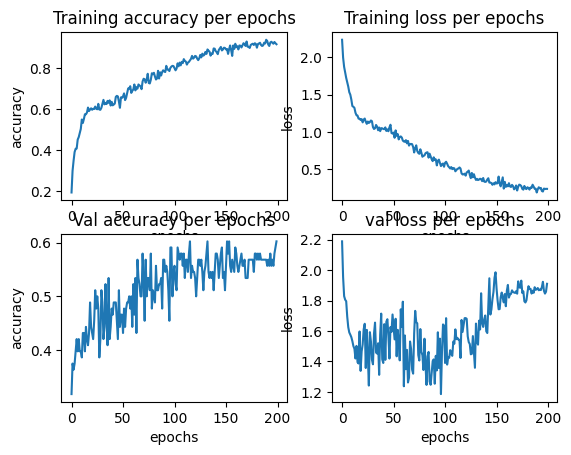

In [25]:
acc_list = []
loss_list = []

val_acc_list = []
val_loss_list = []


def train(train_dataloader, valid_dataloader, model, device, args):
    """
    모델을 훈련시키는 함수입니다.

    Args:
        train_dataloader (DataLoader): 훈련 데이터가 포함된 데이터로더
        model (nn.Module): 훈련할 신경망 모델
        device (torch.device): 모델과 데이터를 올릴 장치 (CPU 또는 GPU)
        args (dict): 훈련 설정을 포함한 딕셔너리 (예: 에포크 수)

    Returns:
        None
    """
    
    # (6-1) 옵티마이저와 손실 함수 정의
    optimizer = optim.Adam(params = model.parameters(), lr = args['lr'])
    loss_fn = nn.CrossEntropyLoss()
    
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, steps_per_epoch=len(train_dataloader), epochs=args['epochs'])

    # 모델의 모든 파라미터의 기울기를 0으로 초기화
    model.zero_grad()

    # 지정된 에포크 수만큼 훈련 반복
    for epoch in range(args["epochs"]):
        print(f'Epoch {epoch + 1}/{args["epochs"]}')
        model.train()
        
        train_loss = 0
        train_acc = 0
        
        
        # 훈련 데이터로더에서 데이터를 반복적으로 가져옴
        for data, label in tqdm(train_dataloader):
            # 데이터를 부동 소수점 형식으로 변환하고 장치에 올림
            data = data.float().to(device)
            label = label.to(device)
            
            # (6-2) 모델을 사용하여 예측 수행
            pred = model(data)
            
            # (6-3) 예측값과 실제 라벨을 사용하여 손실 계산
            loss = loss_fn(pred, label)
            
            # (6-4) 옵티마이저의 기울기를 초기화
            optimizer.zero_grad()
            
            # (6-5) 역전파를 통해 기울기 계산
            loss.backward()
            
            # (6-5.5) gradient-clippping
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            
            # (6-6) 옵티마이저를 사용하여 모델의 파라미터 업데이트
            optimizer.step()
            
            # (6-7) scheduler, lr update
            scheduler.step()
            
            # 총 손실 계산
            train_loss += loss.item()
            
            # 예측값에서 가장 높은 값의 인덱스를 선택
            pred = pred.argmax(dim=1)
            # 정확도 계산
            train_acc += (pred == label).sum().item()
        
        model.eval()
        with torch.no_grad():
            val_loss = 0
            val_acc = 0
            for val_data, val_label in valid_dataloader:
                val_data = val_data.float().to(device)
                val_label = val_label.to(device)
                val_pred = model(val_data)
                cur_loss = loss_fn(val_pred, val_label)
                val_loss += cur_loss.item()
                val_pred = val_pred.argmax(dim=1)
                val_acc += (val_pred == val_label).sum().item()
            
            val_loss /= len(valid_dataloader)
            val_acc /= len(valid_dataloader.dataset)
            val_acc_list.append(val_acc)
            val_loss_list.append(val_loss)
    
        
        # 평균 손실과 정확도 계산
        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader.dataset)
        acc_list.append(train_acc)
        loss_list.append(train_loss)
            
        # 모델과 옵티마이저 상태를 저장
        os.makedirs("results", exist_ok=True)
        torch.save({
            'epoch': epoch,
            'model': model,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss.item,
            }, f'./results/model_state_dict_epoch_{epoch+1}.pth')
            
        #현재 에포크의 손실과 정확도 출력
        print(f'CheckPoint : model_state_dict_epoch_{epoch+1}.pth')
        print(f'Train Loss : {train_loss}, Train Accuracy : {train_acc}')
        print(f'Valid Loss : {val_loss}, Valid Accuracy : {val_acc}\n')
        
    plt.subplot(221)
    plt.plot(acc_list)
    plt.title('Training accuracy per epochs')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    plt.subplot(222)
    plt.plot(loss_list)
    plt.title('Training loss per epochs')
    plt.xlabel('epochs')
    plt.ylabel('loss')
        
    plt.subplot(223)
    plt.plot(val_acc_list)
    plt.title('Val accuracy per epochs')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    plt.subplot(224)
    plt.plot(val_loss_list)
    plt.title('val loss per epochs')
    plt.xlabel('epochs')
    plt.ylabel('loss')
        

if __name__ == "__main__":
    # 훈련 함수 호출
    train(train_dataloader, valid_dataloader, model, device, args)

# **5. 평가**

In [26]:
def test(test_dataloader, model, device):
    """
    모델의 예측을 수행하는 함수입니다.

    Args:
        test_dataloader (DataLoader): 테스트 데이터가 포함된 데이터로더
        model (nn.Module): 예측에 사용할 신경망 모델
        device (torch.device): 모델과 데이터를 올릴 장치 (CPU 또는 GPU)

    Returns:
        preds (list): 예측된 클래스의 정수 인덱스 리스트
    """
    # 모델을 평가 모드로 전환
    model.eval()
    # 예측 결과를 저장할 리스트 초기화
    preds = []
    
    # 데이터로더에서 데이터를 반복적으로 가져옴
    for data in tqdm(test_dataloader):
        # 데이터를 부동 소수점 형식으로 변환하고 장치에 올림
        data = data.float().to(device)
        
        # 기울기 계산을 비활성화하여 예측 수행
        with torch.no_grad():
            # (7-1) 모델을 사용하여 예측 수행
            pred = model(data) 
            
            # (7-2) argmax를 이용하여 예측 결과에서 가장 높은 값의 인덱스를 선택
            pred = pred.argmax(dim=1).cpu().numpy()
            
            # (7-3) 예측 결과를 리스트에 추가
            preds.extend(pred)
            
    return preds
            

def int_to_label(label_map, predictions_int):
    """
    정수 형태의 예측값 리스트를 클래스 라벨로 변환하는 함수입니다.

    Args:
        label_map (dict): 클래스 라벨과 정수 인덱스 매핑이 저장된 딕셔너리
        predictions_int (list): 정수 형태의 예측값 리스트

    Returns:
        predicted_labels (list): 문자열 형태의 예측 클래스 라벨 리스트
    """
    # 정수 예측값을 클래스 라벨로 변환하여 리스트에 저장
    predicted_labels = [list(label_map.keys())[list(label_map.values()).index(pred)] for pred in predictions_int]
    
    return predicted_labels


if __name__ == "__main__":
    # 예측값을 얻기 위해 test 함수 호출
    preds = test(test_dataloader, model, device)
    print(preds)
    
    # 정수 예측값을 클래스 라벨로 변환
    preds = int_to_label(label_map, preds)



  0%|          | 0/300 [00:00<?, ?it/s]


  2%|▏         | 5/300 [00:00<00:07, 41.36it/s]


  3%|▎         | 10/300 [00:00<00:06, 41.49it/s]


  5%|▌         | 15/300 [00:00<00:06, 41.13it/s]


  7%|▋         | 20/300 [00:00<00:06, 40.86it/s]


  8%|▊         | 25/300 [00:00<00:06, 40.21it/s]


 10%|█         | 30/300 [00:00<00:06, 39.72it/s]


 12%|█▏        | 35/300 [00:00<00:06, 40.20it/s]


 13%|█▎        | 40/300 [00:00<00:06, 40.39it/s]


 15%|█▌        | 45/300 [00:01<00:06, 40.38it/s]


 17%|█▋        | 50/300 [00:01<00:06, 41.03it/s]


 18%|█▊        | 55/300 [00:01<00:06, 40.76it/s]


 20%|██        | 60/300 [00:01<00:06, 39.13it/s]


 21%|██▏       | 64/300 [00:01<00:06, 39.08it/s]


 23%|██▎       | 69/300 [00:01<00:05, 39.29it/s]


 24%|██▍       | 73/300 [00:01<00:05, 39.27it/s]


 26%|██▌       | 77/300 [00:01<00:05, 39.21it/s]


 27%|██▋       | 81/300 [00:02<00:05, 39.26it/s]


 29%|██▊       | 86/300 [00:02<00:05, 39.92it/s]


 30%|███       | 91/300 [00:02<00:05, 40.80it/s]


 32%|███▏      | 96/300 [00:02<00:05, 40.20it/s]


 34%|███▎      | 101/300 [00:02<00:05, 39.56it/s]


 35%|███▌      | 105/300 [00:02<00:04, 39.51it/s]


 36%|███▋      | 109/300 [00:02<00:04, 39.42it/s]


 38%|███▊      | 113/300 [00:02<00:04, 39.03it/s]


 39%|███▉      | 118/300 [00:02<00:04, 39.28it/s]


 41%|████      | 122/300 [00:03<00:04, 39.04it/s]


 42%|████▏     | 126/300 [00:03<00:04, 39.18it/s]


 43%|████▎     | 130/300 [00:03<00:04, 38.40it/s]


 45%|████▌     | 135/300 [00:03<00:04, 39.23it/s]


 46%|████▋     | 139/300 [00:03<00:04, 39.15it/s]


 48%|████▊     | 144/300 [00:03<00:03, 39.49it/s]


 50%|████▉     | 149/300 [00:03<00:03, 40.22it/s]


 51%|█████▏    | 154/300 [00:03<00:03, 40.22it/s]


 53%|█████▎    | 159/300 [00:03<00:03, 40.34it/s]


 55%|█████▍    | 164/300 [00:04<00:03, 40.44it/s]


 56%|█████▋    | 169/300 [00:04<00:03, 40.71it/s]


 58%|█████▊    | 174/300 [00:04<00:03, 40.69it/s]


 60%|█████▉    | 179/300 [00:04<00:03, 38.57it/s]


 61%|██████▏   | 184/300 [00:04<00:02, 39.28it/s]


 63%|██████▎   | 188/300 [00:04<00:02, 38.61it/s]


 64%|██████▍   | 193/300 [00:04<00:02, 39.15it/s]


 66%|██████▌   | 198/300 [00:04<00:02, 39.83it/s]


 67%|██████▋   | 202/300 [00:05<00:02, 39.02it/s]


 69%|██████▉   | 207/300 [00:05<00:02, 39.45it/s]


 71%|███████   | 212/300 [00:05<00:02, 40.26it/s]


 72%|███████▏  | 217/300 [00:05<00:02, 40.65it/s]


 74%|███████▍  | 222/300 [00:05<00:01, 41.07it/s]


 76%|███████▌  | 227/300 [00:05<00:01, 40.86it/s]


 77%|███████▋  | 232/300 [00:05<00:01, 40.19it/s]


 79%|███████▉  | 237/300 [00:05<00:01, 40.28it/s]


 81%|████████  | 242/300 [00:06<00:01, 40.02it/s]


 82%|████████▏ | 247/300 [00:06<00:01, 40.38it/s]


 84%|████████▍ | 252/300 [00:06<00:01, 40.25it/s]


 86%|████████▌ | 257/300 [00:06<00:01, 40.49it/s]


 87%|████████▋ | 262/300 [00:06<00:00, 40.83it/s]


 89%|████████▉ | 267/300 [00:06<00:00, 41.05it/s]


 91%|█████████ | 272/300 [00:06<00:00, 40.22it/s]


 92%|█████████▏| 277/300 [00:06<00:00, 40.09it/s]


 94%|█████████▍| 282/300 [00:07<00:00, 40.11it/s]


 96%|█████████▌| 287/300 [00:07<00:00, 40.30it/s]


 97%|█████████▋| 292/300 [00:07<00:00, 40.33it/s]


 99%|█████████▉| 297/300 [00:07<00:00, 40.71it/s]


100%|██████████| 300/300 [00:07<00:00, 40.01it/s]

[8, 3, 5, 9, 4, 0, 7, 8, 9, 6, 8, 7, 9, 9, 3, 3, 8, 3, 4, 6, 4, 4, 7, 7, 8, 0, 0, 7, 5, 0, 5, 6, 4, 7, 8, 3, 9, 6, 8, 5, 4, 1, 1, 7, 4, 2, 9, 1, 5, 9, 0, 2, 4, 4, 3, 7, 6, 1, 7, 9, 4, 2, 9, 0, 0, 4, 7, 0, 3, 1, 3, 5, 9, 6, 5, 1, 1, 4, 6, 5, 4, 4, 3, 8, 7, 3, 2, 4, 5, 3, 3, 2, 3, 0, 4, 2, 6, 7, 9, 6, 7, 0, 2, 5, 6, 6, 1, 8, 3, 7, 3, 8, 0, 2, 3, 5, 1, 6, 9, 3, 2, 2, 7, 9, 7, 8, 5, 9, 9, 5, 0, 7, 2, 6, 5, 9, 0, 8, 5, 0, 6, 3, 8, 0, 3, 4, 7, 7, 6, 1, 6, 8, 1, 0, 4, 5, 7, 0, 1, 5, 6, 2, 5, 0, 9, 7, 3, 0, 8, 6, 2, 8, 9, 2, 4, 6, 1, 4, 7, 0, 6, 2, 6, 0, 2, 8, 4, 7, 5, 7, 4, 4, 6, 0, 3, 0, 8, 9, 1, 8, 8, 8, 4, 8, 4, 3, 6, 0, 3, 0, 8, 5, 8, 7, 6, 2, 8, 8, 8, 8, 2, 8, 4, 5, 5, 6, 5, 5, 6, 0, 7, 7, 2, 9, 1, 0, 3, 8, 3, 0, 8, 4, 5, 2, 1, 4, 8, 9, 1, 7, 8, 1, 6, 0, 5, 1, 2, 6, 2, 9, 0, 4, 9, 2, 1, 7, 1, 1, 1, 5, 2, 3, 3, 8, 0, 7, 1, 7, 4, 9, 9, 3, 7, 1, 2, 2, 1, 1, 5, 6, 0, 3, 5, 1, 2, 1, 6, 3, 9, 5]


In [27]:
submit = pd.read_csv(args["submit_path"])
submit['genre'] = preds
submit.to_csv('submission.csv', index=False)

In [28]:
submit

,music,genre
0,0001.wav,reggae
1,0002.wav,disco
2,0003.wav,jazz
3,0004.wav,rock
4,0005.wav,hiphop
...,...,...
295,0296.wav,classical
296,0297.wav,metal
297,0298.wav,disco
298,0299.wav,rock


## Baseline model info
features : 'rhythm',
batch_size : 32,
epochs: 10,
lr : 2e-5